In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, RocCurveDisplay, PrecisionRecallDisplay

In [27]:
from seaborn import load_dataset #titanic lives in seaborn
import pandas as pd
import seaborn as sns

data = load_dataset('titanic')


In [28]:
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [30]:
data['age'] = data['age'].fillna(data['age'].mean())

In [31]:
data['embarked'] = data['embarked'].fillna(data['embarked'].mode()[0])

In [32]:
data.drop(['deck','sex','embark_town','alive','pclass'], axis=1, inplace=True)

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    891 non-null    int64   
 1   age         891 non-null    float64 
 2   sibsp       891 non-null    int64   
 3   parch       891 non-null    int64   
 4   fare        891 non-null    float64 
 5   embarked    891 non-null    object  
 6   class       891 non-null    category
 7   who         891 non-null    object  
 8   adult_male  891 non-null    bool    
 9   alone       891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(3), object(2)
memory usage: 51.6+ KB


In [35]:
data['who'].unique()

array(['man', 'woman', 'child'], dtype=object)

In [36]:
who = {'man':1, 'woman':0, 'child':2}
data['who'] = data['who'].map(who)

adult = {True:1, False:0}
data['adult_male'] = data['adult_male'].map(adult)

alone = {True:1, False:0}
data['alone'] = data['alone'].map(alone)

In [37]:
data

,survived,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
0,0,22.000000,1,0,7.2500,S,Third,1,1,0
1,1,38.000000,1,0,71.2833,C,First,0,0,0
2,1,26.000000,0,0,7.9250,S,Third,0,0,1
3,1,35.000000,1,0,53.1000,S,First,0,0,0
4,0,35.000000,0,0,8.0500,S,Third,1,1,1
...,...,...,...,...,...,...,...,...,...,...
886,0,27.000000,0,0,13.0000,S,Second,1,1,1
887,1,19.000000,0,0,30.0000,S,First,0,0,1
888,0,29.699118,1,2,23.4500,S,Third,0,0,0
889,1,26.000000,0,0,30.0000,C,First,1,1,1


In [38]:
model_data = pd.get_dummies(data, columns=['embarked','class', 'who'], drop_first=True, dtype=int)

In [39]:
model_data

,survived,age,sibsp,parch,fare,adult_male,alone,embarked_Q,embarked_S,class_Second,class_Third,who_1,who_2
0,0,22.000000,1,0,7.2500,1,0,0,1,0,1,1,0
1,1,38.000000,1,0,71.2833,0,0,0,0,0,0,0,0
2,1,26.000000,0,0,7.9250,0,1,0,1,0,1,0,0
3,1,35.000000,1,0,53.1000,0,0,0,1,0,0,0,0
4,0,35.000000,0,0,8.0500,1,1,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.000000,0,0,13.0000,1,1,0,1,1,0,1,0
887,1,19.000000,0,0,30.0000,0,1,0,1,0,0,0,0
888,0,29.699118,1,2,23.4500,0,0,0,1,0,1,0,0
889,1,26.000000,0,0,30.0000,1,1,0,0,0,0,1,0


In [42]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           891 non-null    float64
 1   sibsp         891 non-null    int64  
 2   parch         891 non-null    int64  
 3   fare          891 non-null    float64
 4   adult_male    891 non-null    int64  
 5   alone         891 non-null    int64  
 6   embarked_Q    891 non-null    int64  
 7   embarked_S    891 non-null    int64  
 8   class_Second  891 non-null    int64  
 9   class_Third   891 non-null    int64  
 10  who_1         891 non-null    int64  
 11  who_2         891 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 83.7 KB


In [41]:
X = model_data.drop('survived', axis=1)
y = model_data['survived']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [44]:
model = LogisticRegression().fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [45]:
pred = model.predict(X_test)

In [47]:
pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1])

In [48]:
np.array(y_test)

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1])

In [50]:
print(accuracy_score(y_test, pred))
print(recall_score(y_test, pred))
print(precision_score(y_test, pred))
print(f1_score(y_test, pred))

0.8100558659217877
0.7297297297297297
0.7941176470588235
0.7605633802816901


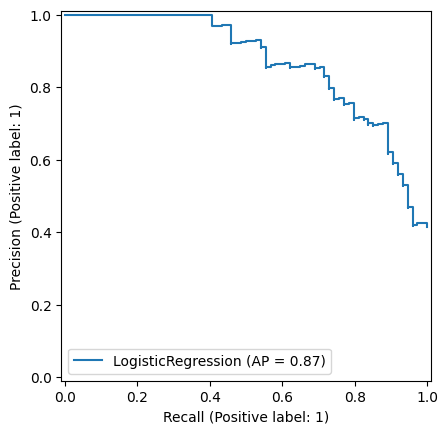

In [51]:
PrecisionRecallDisplay.from_estimator(model, X_test, y_test)

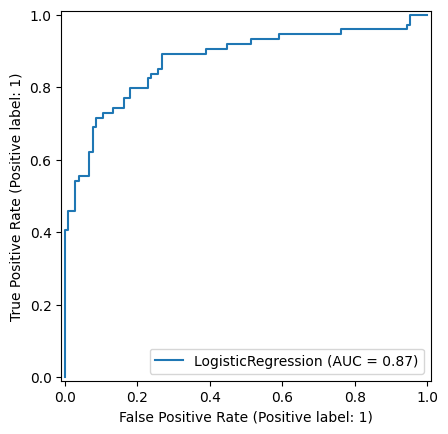

In [52]:
RocCurveDisplay.from_estimator(model, X_test, y_test)